# 3.3 tf.GradientDescentOptimizer クラスで多項式の回帰問題を解く

## 多項式の回帰問題を解く



In [ ]:
import os
is_colab = 'google.colab' in str(get_ipython())   # for Google Colab

if is_colab:              # Colab
    from google.colab import drive
    drive.mount('/content/drive')
    DIR_PREFIX = '/content/drive/MyDrive'
elif os.name == 'nt':    # Windows
    DIR_PREFIX = '.'
else:                     # Mac, Linux
    DIR_PREFIX = '.'

Mounted at /content/drive


In [ ]:
# 3-03-1 データの標準化まで
def standardize(x):
    x_mean = x.mean()
    std = x.std()
    return (x - x_mean) / std

In [ ]:
import numpy as np
import os

DIR="TensorFlow/tf2_book4/ch03/"
data_path = os.path.join(DIR_PREFIX, DIR, 'sales.csv')

data =  np.loadtxt(fname=data_path,
                   dtype='int', 
                   delimiter=',',
                   skiprows=1     # 1行目はタイトルなので読み飛ばす
                  )
train_x = data[:, 0]   # cost
train_y = data[:, 1]   # sales

train_x_std = standardize(train_x)
train_y_std = standardize(train_y)

### グラフを描画する

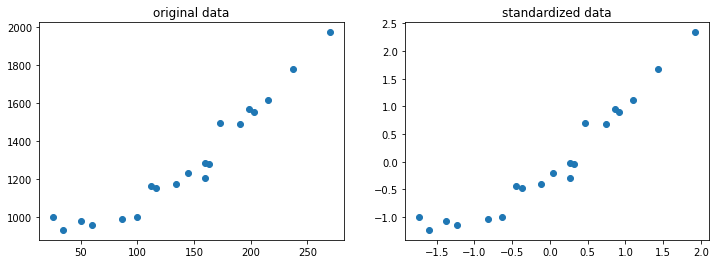

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(6*2,4))
ax[0].scatter(train_x, train_y)
ax[0].set_title('original data')
ax[1].scatter(train_x_std, train_y_std)
ax[1].set_title('standardized data')

plt.show()

### 多項式回帰モデル、損失関数の作成

In [ ]:
# 3-03-2 データフローグラフ
import tensorflow as tf

b = tf.Variable(0.)
w1 = tf.Variable(0.)
w2 = tf.Variable(0.)
w3 = tf.Variable(0.)
w4 = tf.Variable(0.)

In [ ]:
def model(x):
    '''
    多項式回帰モデル
    '''
    y = b + w1 * x + w2 * pow(x,2) + w3 * pow(x, 3) + w4 * pow(x, 4)
    return y

In [ ]:
def loss(y_pred, y_true):
    '''
    Mean Squared Error
    '''
    return tf.math.reduce_mean(tf.math.square(y_pred - y_true))

### 勾配降下アルゴリズムによる最適化処理の実装


In [ ]:
# 3-03-3 セッション部
learning_rate = 0.01
epochs = 200

for i in range(epochs):
    with tf.GradientTape() as tape:
        y_pred = model(train_x_std)
        tmp_loss = loss(y_pred, train_y_std)
    gradients = tape.gradient(tmp_loss, [b, w1, w2, w3, w4])
    b.assign_sub(learning_rate * gradients[0])
    w1.assign_sub(learning_rate * gradients[1])
    w2.assign_sub(learning_rate * gradients[2])
    w3.assign_sub(learning_rate * gradients[3])
    w4.assign_sub(learning_rate * gradients[4])
    
    if (i + 1) % 50 == 0:
        print(f'Step: {(i+1)} b={b.numpy()} w1={w1.numpy()} w2={w2.numpy()} w3={w3.numpy()} w4={w4.numpy()}')
        print(f'Loss={tmp_loss}')

Step: 50 b=-0.04034848138689995 w1=0.2685434818267822 w2=0.02827165089547634 w3=0.250828355550766 w4=0.02852054499089718
Loss=0.17421624064445496
Step: 100 b=-0.07001537829637527 w1=0.3970474302768707 w2=0.05889112874865532 w3=0.20271700620651245 w4=0.024918753653764725
Loss=0.13260361552238464
Step: 150 b=-0.09625568240880966 w1=0.5059216618537903 w2=0.08497072756290436 w3=0.16168782114982605 w4=0.021987419575452805
Loss=0.10256265103816986
Step: 200 b=-0.11907878518104553 w1=0.5982825756072998 w2=0.10732477903366089 w3=0.12687323987483978 w4=0.019497673958539963
Loss=0.0808706060051918


グラフに描画して確認する。

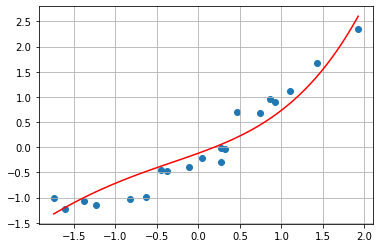

In [ ]:
# 3-03-4 改 学習した重みで回帰モデルを描画する

%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1,figsize=(6,4))
ax.scatter(train_x_std, train_y_std)

max_x_std = max(train_x_std)
min_x_std = min(train_x_std)
x = np.linspace(min_x_std, max_x_std, 100)
y = b + w1 * x + w2 * pow(x, 2) + w3 * pow(x, 3) + w4 * pow(x, 4)

ax.plot(x, y, c='red')
ax.grid(True)

plt.show()